# PRÁCTICA ML 

Primero cargo librerías que voy a utilizar más adelante

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

Cargo y leo el dataset

In [2]:
airbnb = pd.read_csv("./airbnb-listings-extract.csv", sep=";")
airbnb.head(8)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
5,15695269,https://www.airbnb.com/rooms/15695269,20170407214050,2017-04-08,55. Valencia II Apartment,"Unique apartment in vibrant neighborhoods, car...",This fully refurbished apartment has 2 bedroom...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,92.0,NaN,"41.3825366724,2.14957707323","Host Has Profile Pic,Host Identity Verified,Is..."
6,1295958,https://www.airbnb.com/rooms/1295958,20170407214050,2017-04-08,3 BR + 2 baths near the beach!!,Spacious and quiet apartment that can accommod...,Its size allows to accommodate up to 6 people ...,Spacious and quiet apartment that can accommod...,none,"This unique area is rich in history, architect...",...,10.0,9.0,9.0,HUTB-0077039-0,NaN,strict,1.0,1.22,"41.3990576554,2.18422942312","Host Has Profile Pic,Is Location Exact,Require..."
7,1349311,https://www.airbnb.com/rooms/1349311,20170407214050,2017-04-08,Room & bathroom @ Sagrada Familia,"FEBRUARY 6-10, entire apartment available - 2 ...",Our apartment has been recently renovated pres...,"FEBRUARY 6-10, entire apartment available - 2 ...",none,I love arriving home from work and suddenly se...,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,0.64,"41.4023570187,2.17111908017","Host Has Profile Pic,Is Location Exact,Require..."


In [3]:
len(airbnb.columns)

89

Preparo los datos y los divido en train y test utilizando sklearn

Voy a quedarme con aquellas columnas que podrían aportarme algo para la resolución del problema y quitar aquellas que claramente no me aportará nada

In [4]:
lista_de_columnas = airbnb.columns.tolist()

# Imprimir la lista de nombres de columnas
print(lista_de_columnas)

['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Max

In [5]:
columnasDeInteres =['City','Room Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Bed Type','Amenities','Security Deposit', 'Cleaning Fee','Price','Square Feet','Guests Included','Extra People','Review Scores Rating','Latitude', 'Longitude']
nueva_df = airbnb[columnasDeInteres].copy()

print(nueva_df.head())

        City        Room Type                    Neighbourhood  Accommodates  \
0     Austin  Entire home/apt                              NaN             2   
1  Barcelona  Entire home/apt                              NaN             4   
2  Barcelona  Entire home/apt                              NaN             4   
3  Barcelona  Entire home/apt                              NaN             8   
4  Barcelona  Entire home/apt  L'Antiga Esquerra de l'Eixample             5   

   Bathrooms  Bedrooms  Beds  Bed Type  \
0        1.0       1.0   1.0  Real Bed   
1        1.0       1.0   1.0  Real Bed   
2        1.0       1.0   1.0  Real Bed   
3        2.0       3.0   4.0  Real Bed   
4        1.0       2.0   2.0  Real Bed   

                                           Amenities  Security Deposit  \
0  TV,Cable TV,Internet,Wireless Internet,Air con...             100.0   
1  Wireless Internet,Air conditioning,Elevator in...             200.0   
2  Wireless Internet,Air conditioning,Elevat

In [6]:
nueva_df.dtypes

City                     object
Room Type                object
Neighbourhood            object
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Bed Type                 object
Amenities                object
Security Deposit        float64
Cleaning Fee            float64
Price                   float64
Square Feet             float64
Guests Included           int64
Extra People              int64
Review Scores Rating    float64
Latitude                float64
Longitude               float64
dtype: object

In [7]:
nueva_df['Room Type'].value_counts()

Entire home/apt    8976
Private room       5595
Shared room         209
Name: Room Type, dtype: int64

In [8]:
nueva_df['Amenities'].value_counts()

TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                                                                    41
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Washer,Essentials,Shampoo                                                                                                                                                                                                                                                                                                                                    36
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,

Voy a crear una nueva columna que cuente la cantidad de comodidades que tiene cada airbnb, porque creo puedo tener relevancia a la hora de calcular el precio.
Para eso me creo primero una función para que me cuente la cantidad de comodidades, teniendo en cuenta que puede haber solo uno o tener un error tipo "translation missing: en.hosting_amenity_49"

In [9]:
def contar_comodidades(amenities):
    if isinstance(amenities, str):
        # Separo las comodidades por comas y elimino espacios en blanco
        lista_comodidades = [comodidad.strip() for comodidad in amenities.split(',')]

        # Filtro elementos no vacíos
        comodidades_validas = [comodidad for comodidad in lista_comodidades if comodidad]

        if comodidades_validas:
            return len(comodidades_validas)
        # En el caso de que solo tengan una comodidad
        else:
            return 1
    else:
        return np.nan

In [10]:
nueva_df['N_Amenities'] = nueva_df['Amenities'].apply(contar_comodidades)

print(nueva_df[['Amenities', 'N_Amenities']].head())

                                           Amenities  N_Amenities
0  TV,Cable TV,Internet,Wireless Internet,Air con...         23.0
1  Wireless Internet,Air conditioning,Elevator in...          7.0
2  Wireless Internet,Air conditioning,Elevator in...          7.0
3  TV,Internet,Wireless Internet,Air conditioning...         24.0
4  TV,Wireless Internet,Air conditioning,Kitchen,...         12.0


In [11]:
nueva_df = nueva_df.drop('Amenities', axis=1)

Ahora voy a pasar los pies cuadrados a metros cuadrados

In [12]:
nueva_df["MetrosCuadrados"] = nueva_df["Square Feet"].apply(lambda x: x * 0.3048 * 0.3048)
nueva_df.head(5)

,City,Room Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,N_Amenities,MetrosCuadrados
0,Austin,Entire home/apt,NaN,2,1.0,1.0,1.0,Real Bed,100.0,NaN,58.0,NaN,1,0,98.0,30.337361,-97.863277,23.0,NaN
1,Barcelona,Entire home/apt,NaN,4,1.0,1.0,1.0,Real Bed,200.0,40.0,70.0,NaN,2,44,80.0,41.389683,2.172625,7.0,NaN
2,Barcelona,Entire home/apt,NaN,4,1.0,1.0,1.0,Real Bed,200.0,60.0,70.0,NaN,2,42,NaN,41.393035,2.162173,7.0,NaN
3,Barcelona,Entire home/apt,NaN,8,2.0,3.0,4.0,Real Bed,250.0,79.0,229.0,NaN,2,39,92.0,41.396967,2.167418,24.0,NaN
4,Barcelona,Entire home/apt,L'Antiga Esquerra de l'Eixample,5,1.0,2.0,2.0,Real Bed,NaN,55.0,149.0,NaN,1,0,NaN,41.388685,2.155150,12.0,NaN


In [13]:
# y voy a quitar la columna pies cuadrados
nueva_df= nueva_df.drop("Square Feet", axis=1)

Ahora voy a intentar ver si tengo outliers en alguna variable

In [14]:
nueva_df.describe(include='all')

,City,Room Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Price,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,N_Amenities,MetrosCuadrados
count,14774,14780,9551,14780.000000,14725.000000,14755.000000,14731.00000,14780,6256.000000,8687.000000,14763.000000,14780.000000,14780.000000,11476.000000,14780.000000,14780.000000,14610.000000,598.000000
unique,246,3,390,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Madrid,Entire home/apt,Malasaña,NaN,NaN,NaN,NaN,Real Bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13207,8976,895,NaN,NaN,NaN,NaN,14456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.277808,1.281732,1.343816,2.04426,NaN,189.226822,31.805341,73.561471,1.589986,7.690460,91.697978,40.497626,-3.858041,14.435455,36.274598
std,NaN,NaN,NaN,2.097291,0.658517,0.900078,1.61277,NaN,115.151070,30.878599,72.062050,1.182550,12.971352,8.989101,4.641387,14.123146,4.654359,59.191772
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.00000,NaN,0.000000,0.000000,9.000000,0.000000,0.000000,20.000000,-37.851182,-123.131344,1.000000,0.000000
25%,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.00000,NaN,100.000000,15.000000,34.000000,1.000000,0.000000,89.000000,40.409726,-3.707604,11.000000,0.000000
50%,NaN,NaN,NaN,3.000000,1.000000,1.000000,2.00000,NaN,150.000000,25.000000,55.000000,1.000000,0.000000,94.000000,40.419466,-3.700785,14.000000,9.150949
75%,NaN,NaN,NaN,4.000000,1.000000,2.000000,2.00000,NaN,200.000000,40.000000,86.000000,2.000000,15.000000,98.000000,40.430916,-3.684057,17.000000,60.015364


In [15]:
nueva_df = nueva_df[nueva_df['MetrosCuadrados'] != 0.0]

conteo_sqmeters = nueva_df['MetrosCuadrados'].value_counts().sort_index()
print(conteo_sqmeters)

0.743224      2
0.836127      1
0.929030      1
1.486449      1
2.043867      1
             ..
280.009763    1
319.958070    1
349.965752    1
480.030008    1
650.042571    1
Name: MetrosCuadrados, Length: 102, dtype: int64


Voy a ver si haciendo una matriz de correlación entre mi variabe de interés que es Precio y otras que pueden ser interesantes

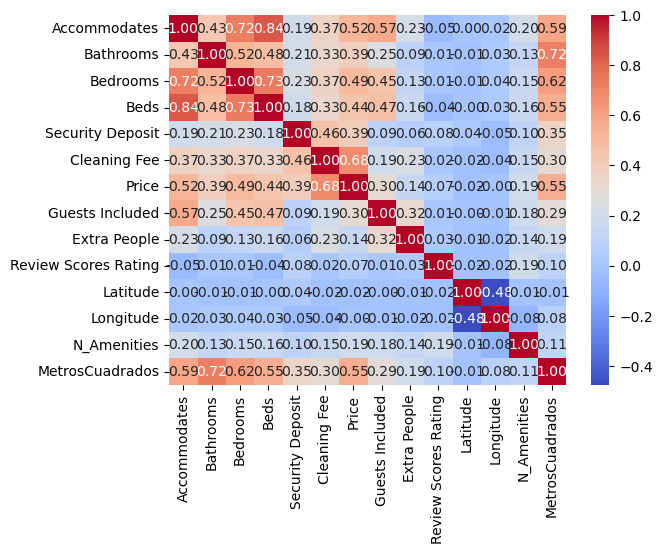

In [16]:
matriz_correlacion = nueva_df.corr()

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

Veo que tanto la longitud como la latitud no muestra correlación lineal con el precio

In [17]:
nueva_df = nueva_df.drop('Latitude', axis=1)
nueva_df = nueva_df.drop('Longitude', axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder
columnas_transform = ["City","Room Type","Neighbourhood", "Bed Type"]
label_encoder = LabelEncoder()
for columna in columnas_transform:
    nueva_df[columna] = label_encoder.fit_transform(nueva_df[columna])
features = nueva_df.columns.drop("Price")
features

Index(['City', 'Room Type', 'Neighbourhood', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Review Scores Rating',
       'N_Amenities', 'MetrosCuadrados'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

# Yo voy a optar por hacer dropna
nueva_df= nueva_df.dropna()

X = nueva_df.drop('Price',axis=1)
y = nueva_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)


In [20]:
#Compruebo que se haya hecho bien la forma y el tipo durante la división

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [21]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (118, 15)
Forma de X_test: (51, 15)
Forma de y_train: (118,)
Forma de y_test: (51,)


In [22]:
X_train.dtypes

City                      int32
Room Type                 int32
Neighbourhood             int32
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Bed Type                  int32
Security Deposit        float64
Cleaning Fee            float64
Guests Included           int64
Extra People              int64
Review Scores Rating    float64
N_Amenities             float64
MetrosCuadrados         float64
dtype: object

Una vez dividido mi dataset, voy a intentar hacer la selección de mis variables con RandomForest

C:\Users\Drakharys\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best mean cross-validation score: 0.119
best parameters: {'max_depth': 10}


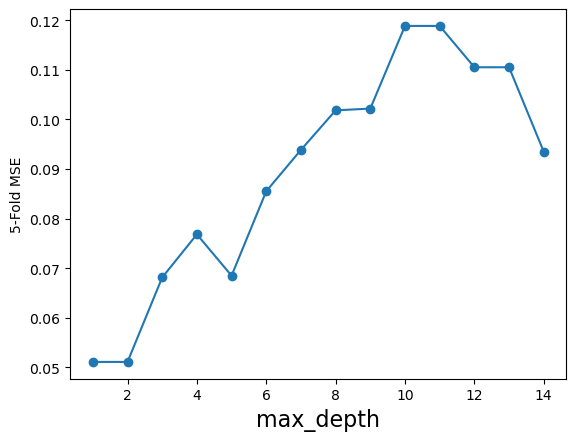

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [24]:
maxDepthOptimo = grid.best_params_['max_depth'] 
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.7542372881355932
Test:  0.058823529411764705


Entrenado un poco el arbol de desición, voy a ver qué pasa si hago ahora sí RandomForest y Baggins

C:\Users\Drakharys\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best mean cross-validation score: 0.136
best parameters: {'max_depth': 3}


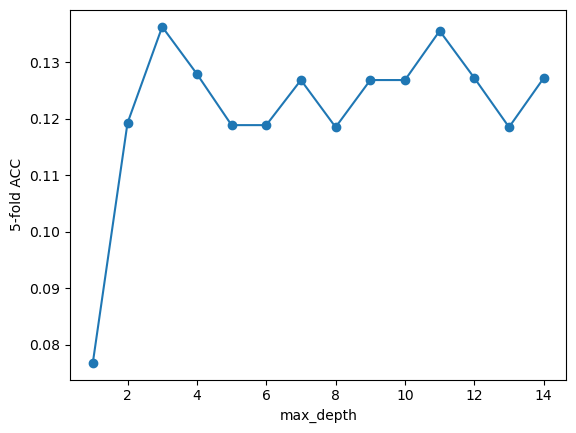

In [25]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

In [26]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.5
Test:  0.0392156862745098


C:\Users\Drakharys\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best mean cross-validation score: 0.145
best parameters: {'base_estimator__max_depth': 6}


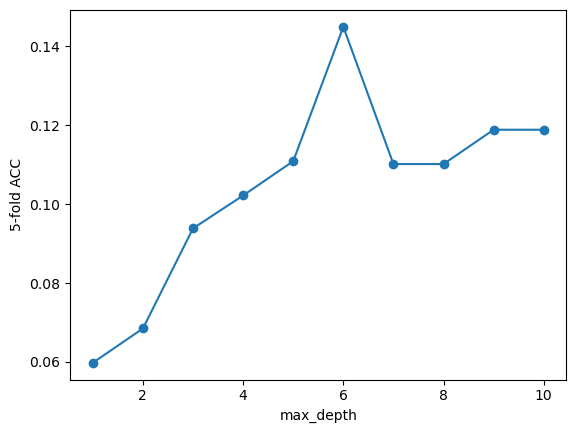

In [27]:
from sklearn.ensemble import BaggingClassifier

# grid search
maxDepth = range(1,11)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=150), param_grid=tuned_parameters,cv=5) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

In [28]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
baggingModel = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.8983050847457628
Test:  0.058823529411764705


Veo que Baggins me dará mejores resultados

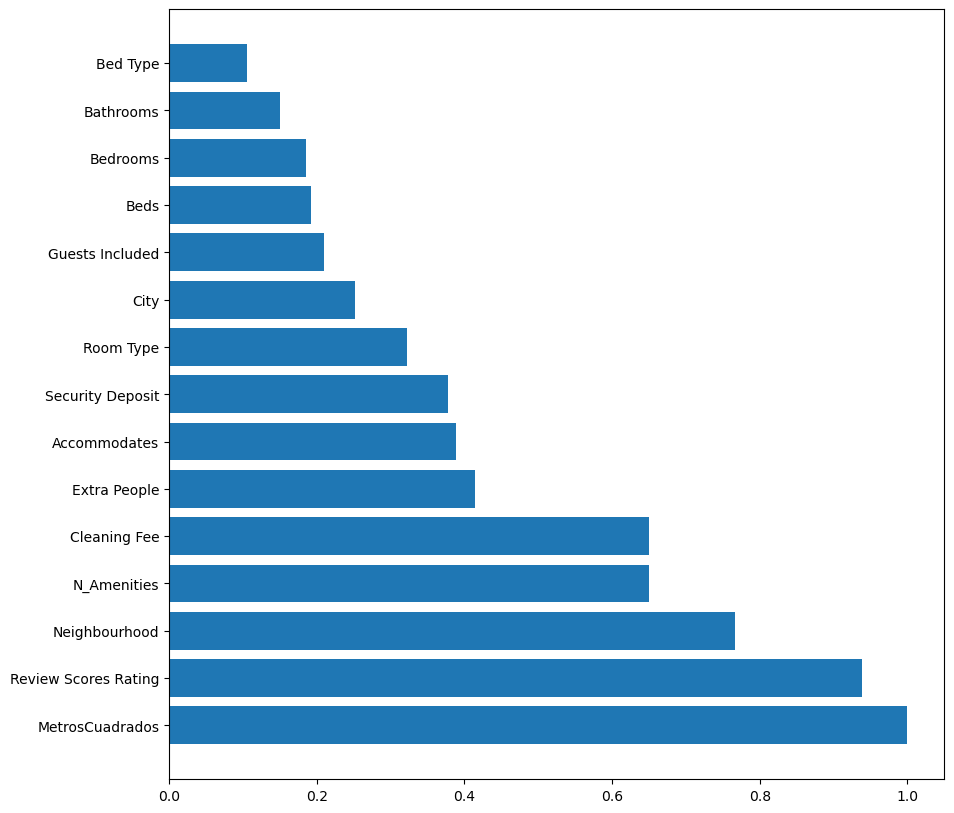

In [29]:
importances = np.mean([tree.feature_importances_ for tree in baggingModel.estimators_], axis=0)
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Veo que las variables que mejor podrán ayudarme con mi modelo serán Cleaning Fee, N_amenities, Neighbourhood, Review Scores Rating y Metros Cuadrados

Ahora voy a probar con RandomForest